In [1]:
from script.NeuralNets.Networks import ICNN, SequentialNN
from torch.utils.data import DataLoader
from script.dataInit import ConvexDataset, Rhombus
from script.NeuralNets.trainFunction import train_icnn
from script.eval import Plots_for
from script.Verification.Verification import verification
import torch
import torchvision as tv
from script.DHOV.Normalisation import normalize_nn, get_std, get_mean, normalize_data
import matplotlib

In [2]:
epochs = 3
batch_size = 1
number_of_train_samples = 10000
hyper_lambda = 0.1
x_range = [-1.5, 1.5]
y_range = [-1.5, 1.5]

non_normalized_icnn = ICNN([2, 10, 10, 1])
normalized_icnn = ICNN([2, 10, 10, 1])

#matplotlib.use("TkAgg")

In [3]:
norm_included_space, norm_ambient_space = Rhombus().get_uniform_samples(number_of_train_samples, x_range, y_range)  #samples will be split in inside and outside the rhombus
true_extremal_points = Rhombus().get_extremal_points()
std = torch.tensor([0.001,0.001], dtype=torch.float64)
mean = torch.tensor([1,2], dtype=torch.float64)

def un_norm(samples):
    new_tensor = torch.empty(samples.size(), dtype=torch.float64)
    for i in range(len(new_tensor)):
        new_tensor[i] = samples[i] * std + mean
    return new_tensor

print(norm_included_space[0])
un_norm_included_space = tv.transforms.Lambda(lambda samples: un_norm(samples))(norm_included_space).detach().requires_grad_(True)
un_norm_ambient_space = tv.transforms.Lambda(lambda samples: un_norm(samples))(norm_ambient_space).detach().requires_grad_(True)
print(un_norm_included_space[0])


"""true_extremal_points = [[0,0]]
un_norm_ambient_space = torch.load("../../ambient_space_after_relu.pt", weights_only=True)
un_norm_included_space = torch.load("../../included_space_after_relu.pt", weights_only=True)

mean = get_mean(un_norm_included_space, un_norm_ambient_space)
std = get_std(un_norm_included_space, un_norm_ambient_space)

norm_included_space, norm_ambient_space = normalize_data(un_norm_included_space, un_norm_ambient_space, mean, std)
"""

tensor([0.1223, 0.1270], dtype=torch.float64)
tensor([1.0001, 2.0001], dtype=torch.float64, grad_fn=<SelectBackward0>)


'true_extremal_points = [[0,0]]\nun_norm_ambient_space = torch.load("../../ambient_space_after_relu.pt", weights_only=True)\nun_norm_included_space = torch.load("../../included_space_after_relu.pt", weights_only=True)\n\nmean = get_mean(un_norm_included_space, un_norm_ambient_space)\nstd = get_std(un_norm_included_space, un_norm_ambient_space)\n\nnorm_included_space, norm_ambient_space = normalize_data(un_norm_included_space, un_norm_ambient_space, mean, std)\n'

In [4]:
norm_dataset = ConvexDataset(data=norm_included_space)
norm_train_loader = DataLoader(norm_dataset, batch_size=batch_size, shuffle=True)
norm_dataset = ConvexDataset(data=norm_ambient_space)
norm_ambient_loader = DataLoader(norm_dataset, batch_size=batch_size, shuffle=True)

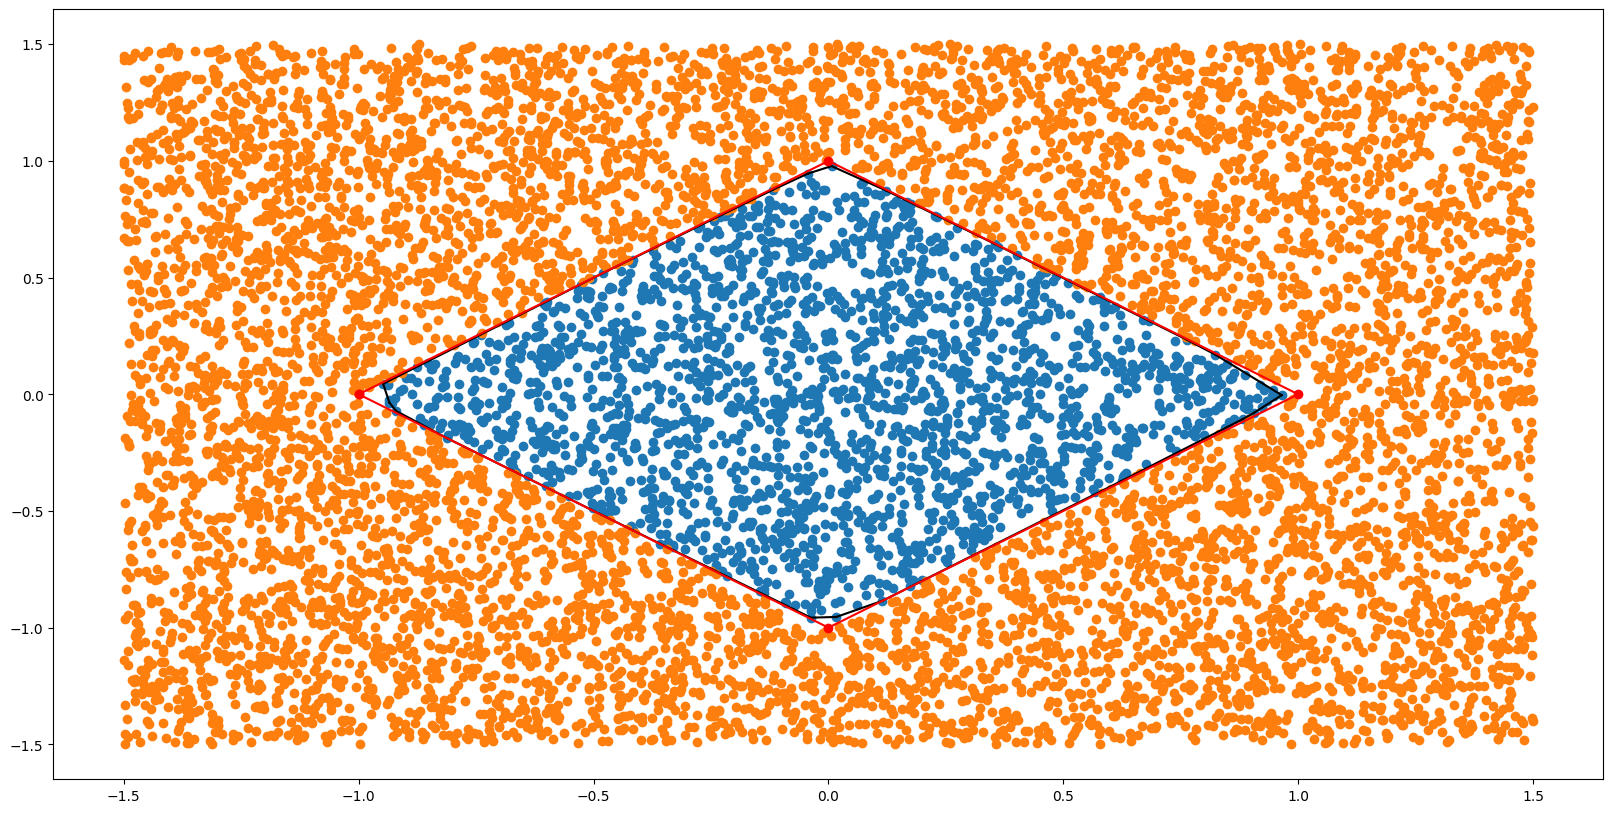

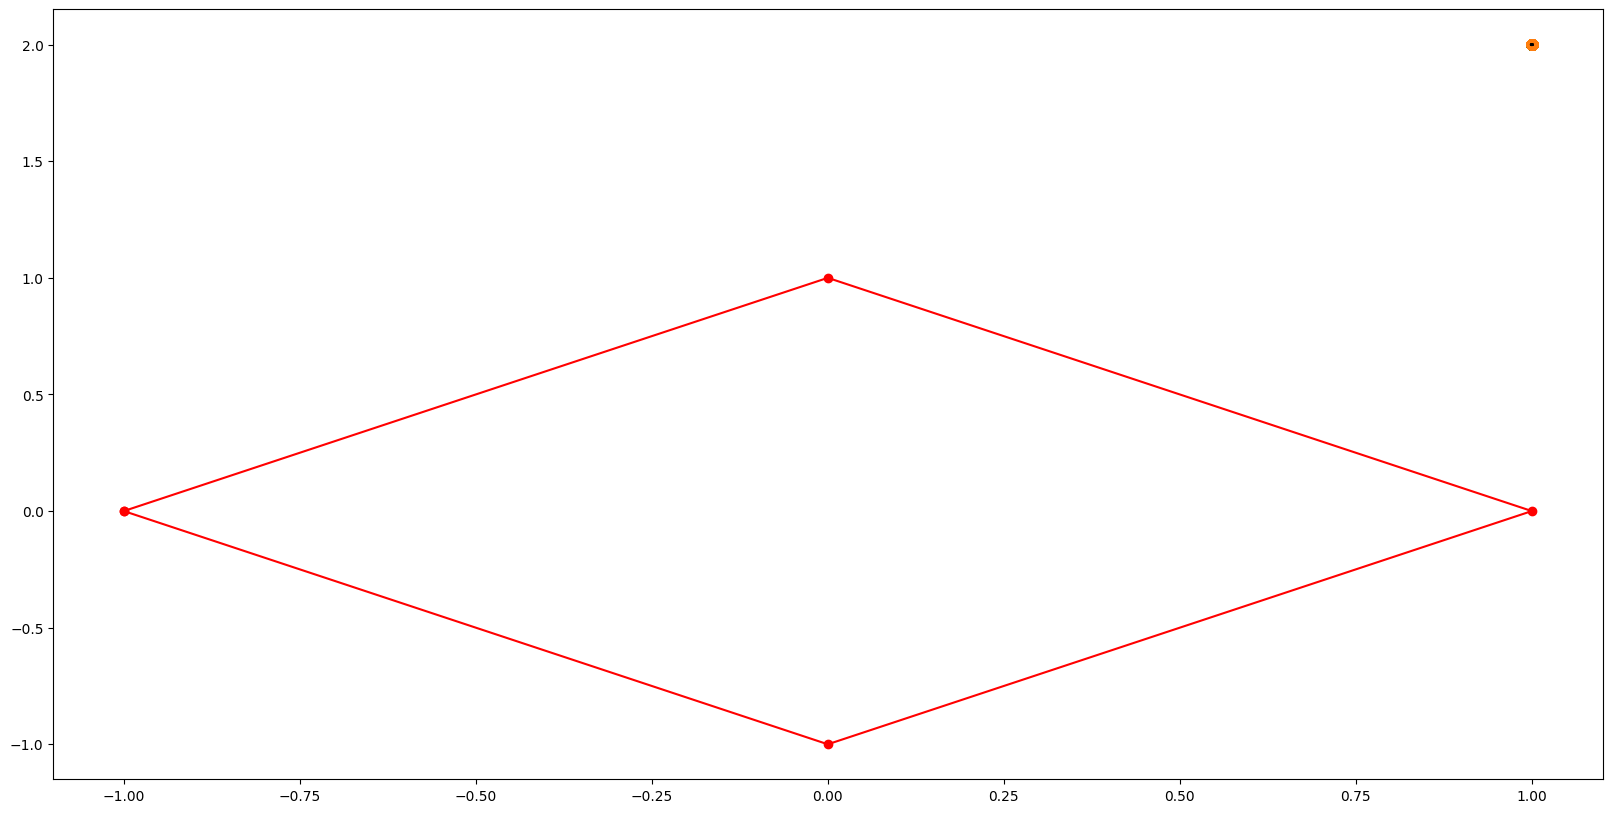

In [5]:
norm_plots = Plots_for(0, non_normalized_icnn, norm_included_space.detach(), norm_ambient_space.detach(), x_range, y_range, extr=true_extremal_points)
norm_plots.plt_initial()

un_norm_plots = Plots_for(0, normalized_icnn, un_norm_included_space.detach(), un_norm_ambient_space.detach(), [0.998, 1.002], [1.998, 2.002], extr=true_extremal_points)
un_norm_plots.plt_initial()

In [6]:
history = train_icnn(non_normalized_icnn, norm_train_loader,norm_ambient_loader, epochs=epochs, hyper_lambda=hyper_lambda)

=== Epoch: 0===
batch = 0, mean loss = 0.7346088136830659
batch = 100, mean loss = 0.7942044595547472
batch = 200, mean loss = 0.7540396110514026
batch = 300, mean loss = 0.7241886173528322
batch = 400, mean loss = 0.7003497883325065
batch = 500, mean loss = 0.6827280806909268
batch = 600, mean loss = 0.6661333042631348
batch = 700, mean loss = 0.6497714451012192
batch = 800, mean loss = 0.6339642379866056
batch = 900, mean loss = 0.6206972651414849
batch = 1000, mean loss = 0.6075098639076295
batch = 1100, mean loss = 0.59524708026172
batch = 1200, mean loss = 0.5831751008976
batch = 1300, mean loss = 0.5717602431512401
batch = 1400, mean loss = 0.5612331441911804
batch = 1500, mean loss = 0.550910397870989
batch = 1600, mean loss = 0.5411402989355759
batch = 1700, mean loss = 0.5316578861972372
batch = 1800, mean loss = 0.522306398045515
batch = 1900, mean loss = 0.5133156076613181
batch = 2000, mean loss = 0.5054126334124398
batch = 2100, mean loss = 0.49776726978830677
batch = 2196

In [7]:
normalized_icnn.load_state_dict(non_normalized_icnn.state_dict())
normalize_nn(normalized_icnn, mean, std, isICNN=True)


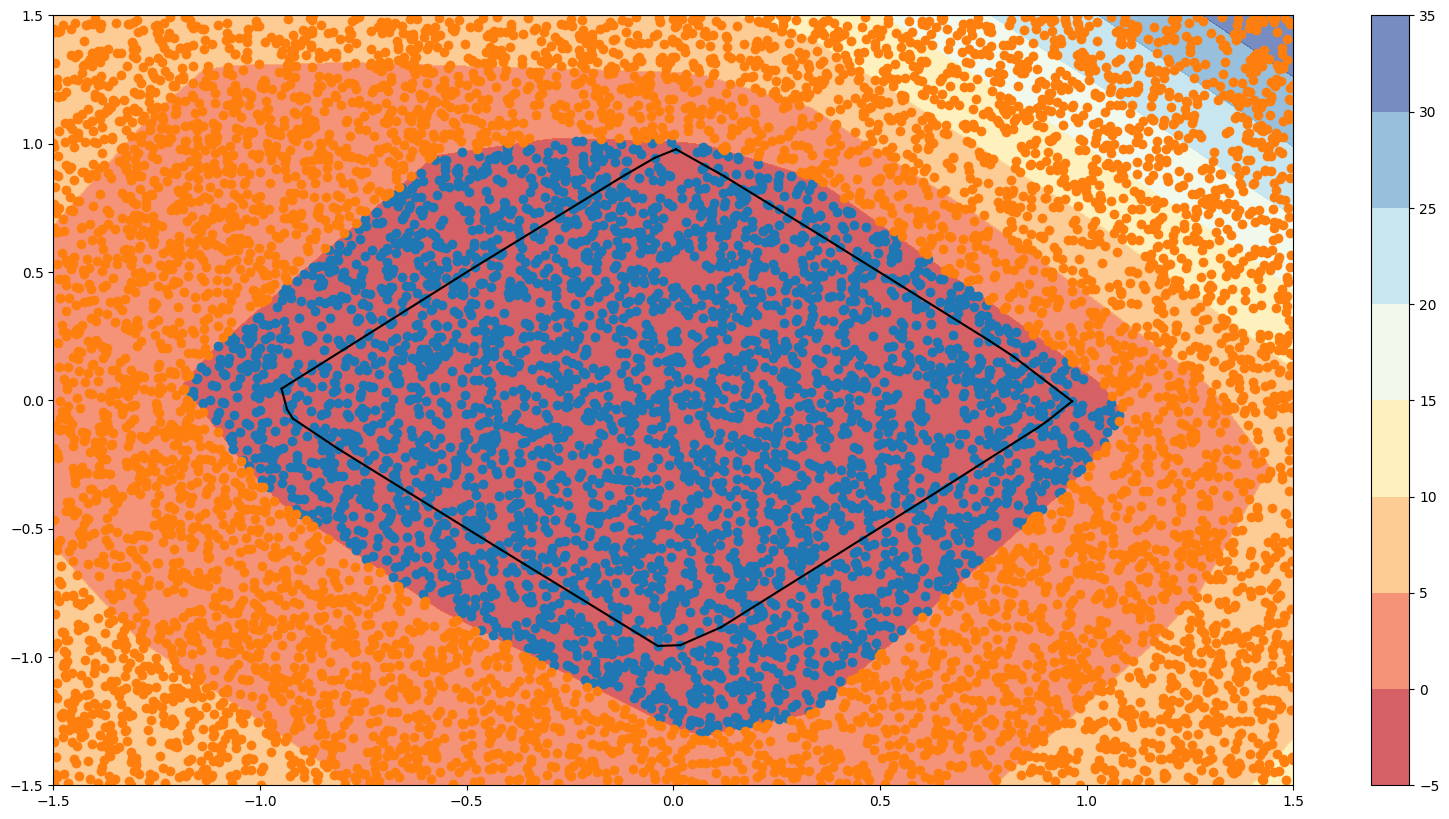

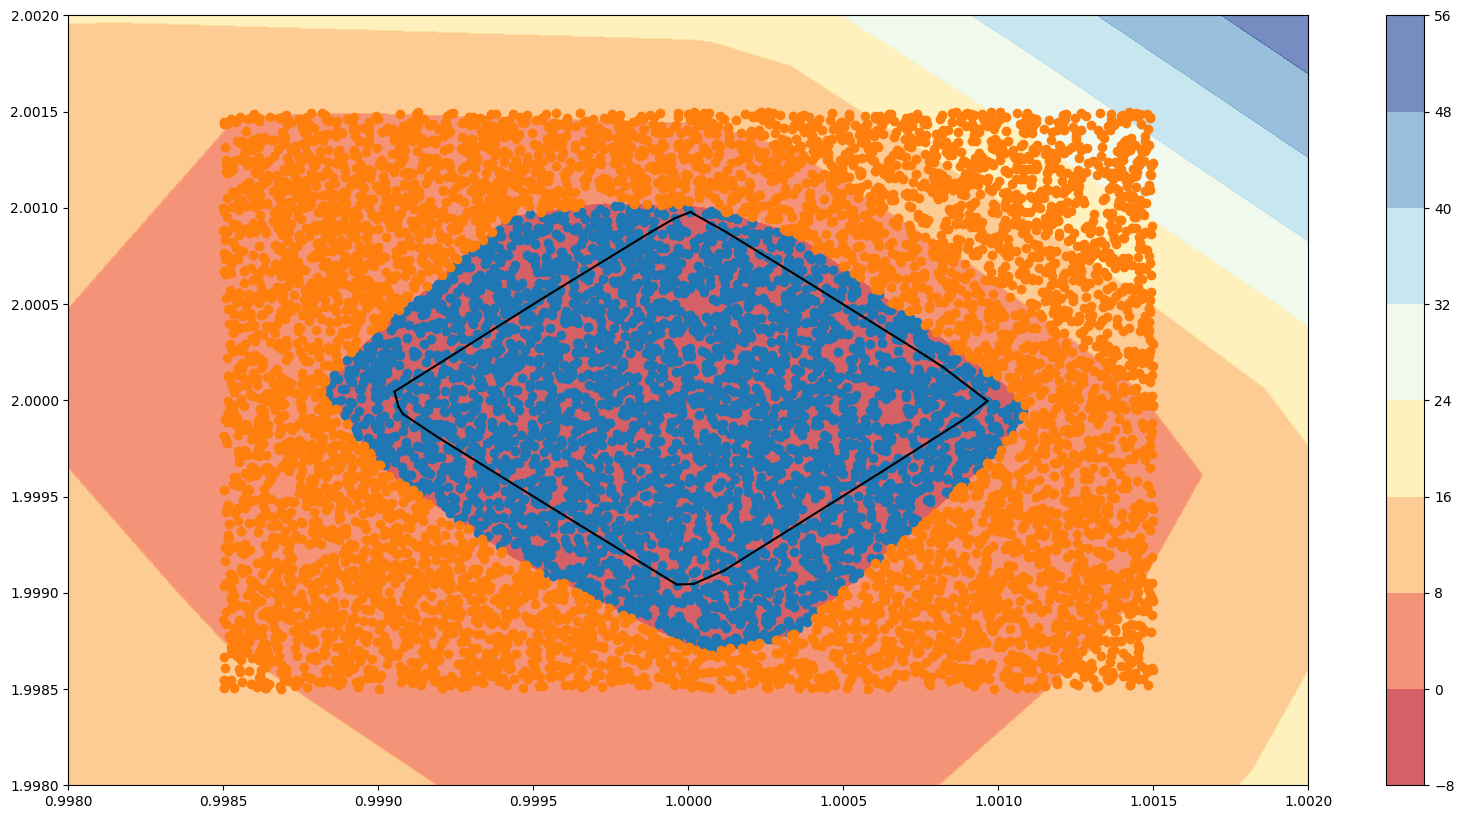

In [8]:
norm_plots.plt_mesh()
un_norm_plots.plt_mesh()

In [9]:
import numpy as np
center = [1.18125, 2.367]
eps = 0.002
print("max: {}, {}".format(center[0]-eps, center[0]+eps))
print("min: {}, {}".format(center[1]-eps, center[1]+eps))
A, b = Rhombus().get_A(), Rhombus().get_b()
result = verification(normalized_icnn, A_b=[A,b])

max: 1.17925, 1.18325
min: 2.365, 2.3689999999999998
Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-12
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (win64)

CPU model: AMD Ryzen 7 5800H with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 138 rows, 96 columns and 387 nonzeros
Model fingerprint: 0x12758fd3
Variable types: 76 continuous, 20 integer (20 binary)
Coefficient statistics:
  Matrix range     [9e-10, 5e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 5e+03]
  RHS range        [2e-01, 5e+03]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 53 rows and 25 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 0

Model is infeasible o

In [10]:
input_data, un_norm_plots.c = result
un_norm_plots.plt_mesh()

TypeError: cannot unpack non-iterable NoneType object